In [1]:
# Load all packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Load the data

In [2]:
hotel = pd.read_csv('D:\Jupyter_Notebook\Hotel_Demand\data\hotel_featured.csv')

In [3]:
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0,0,0,3,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,2,0,0,0,4,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Split data into training and testing subsets

In [4]:
X = hotel.drop(columns=['is_canceled'])
y = hotel['is_canceled']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [6]:
# Use MinMaxScaler to scale data into range (0,1), not using StandardScale here because many columns should not contain negative values
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train) 
X_train = pd.DataFrame(X_train,columns=X.columns)

X_test=scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

### Modeling

#### PCA

Text(0.5, 0, 'PCA feature')

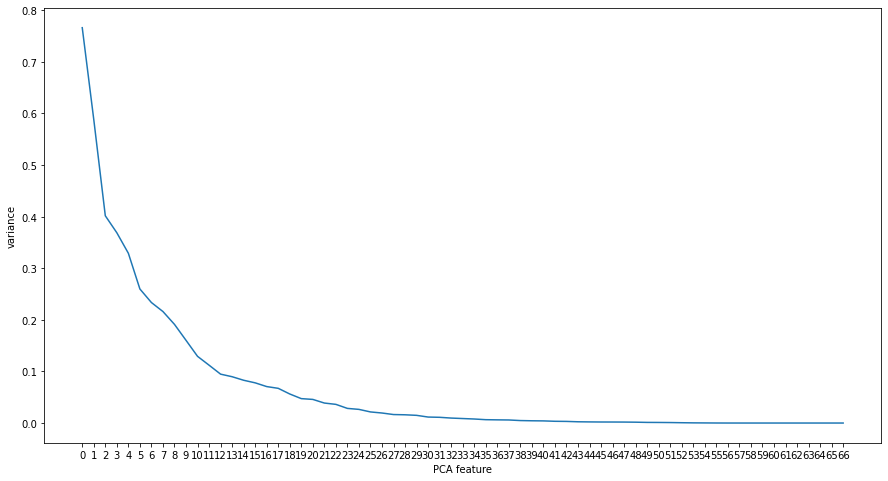

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

features = range(pca.n_components_)
fig= plt.figure(figsize=(15,8))
plt.plot(features,pca.explained_variance_)
plt.rc('xtick', labelsize=5)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')

# 12 components looks like a good choice.

In [8]:
pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
model = KMeans(n_clusters=2)

labels = model.fit_predict(X_train_pca)

In [12]:
print(accuracy_score(y_train, labels))
print(precision_score(y_train, labels))

0.46732588134135855
0.2639250390421655


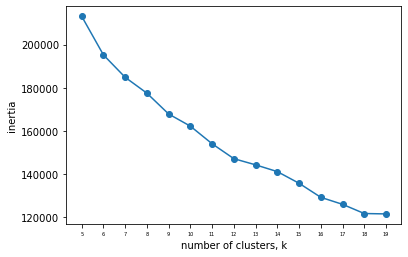

In [14]:
# Inertia
inertia_ = []

ks = range(5,20)
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_pca)
    
    # Append the inertia to the list of inertias
    inertia_.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertia_, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()